In [1]:
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt 
import json   as j 

# 
import seaborn as sns 
import folium  as f 

import warnings
warnings.filterwarnings('ignore')

print('numpy   version , ' , np.__version__)
print('pandnas version , ' , pd.__version__)

numpy   version ,  1.24.3
pandnas version ,  1.5.3


In [2]:
%matplotlib inline

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False    
    
import warnings
warnings.filterwarnings(action='ignore')    

In [3]:
mpgFrm = pd.read_excel('./data/mpg_visualization.xlsx' , 
                       index_col = 0)
mpgFrm.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
mpgFrm.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [5]:
mpgFrm['cyl'].unique()

array([4, 6, 8, 5], dtype=int64)

In [6]:
mpgFrm.shape

(234, 11)

In [7]:
mpgFrm.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


양적 자료(데이터)
- 요약정보에 집계가 되는 컬럼으로 관측된 값이 수치 형태의 속성
- box plot

질적 자료(데이터)
- 범주 또는 순서 형태의 속성을 가진 자료로 데이터의 분포를 확인해야하는 값들
- bar plot

In [8]:
mpgFrm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


양적자료만 추출하여 서브셋 구축 - 


<Axes: >

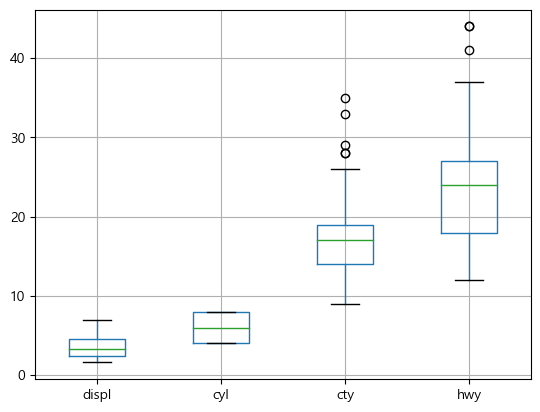

In [9]:
print('양적자료만 추출하여 서브셋 구축 - ')
subset = mpgFrm.loc[:, ['displ','cyl','cty','hwy']]

subset.boxplot() # boxplot은 사분위수로 봐야한다. 팬스 밖으로 나간 데이터는 이상치로 확인할 수 있음. --- 은 max, min, 박스의 3가지 선은 1,2,3사분위 / 박스 모양은 IQR

In [10]:
print('질적자료 - 분포 value_counts()')
print('제조사의 분포를 확인하고 싶다 - ')
mpgFrm['manufacturer'].value_counts() # 각각의 제조사에 대한 분포를 확인할 수 있다.
mpgFrm['manufacturer'].value_counts().values


질적자료 - 분포 value_counts()
제조사의 분포를 확인하고 싶다 - 


array([37, 34, 27, 25, 19, 18, 14, 14, 13,  9,  8,  5,  4,  4,  3],
      dtype=int64)

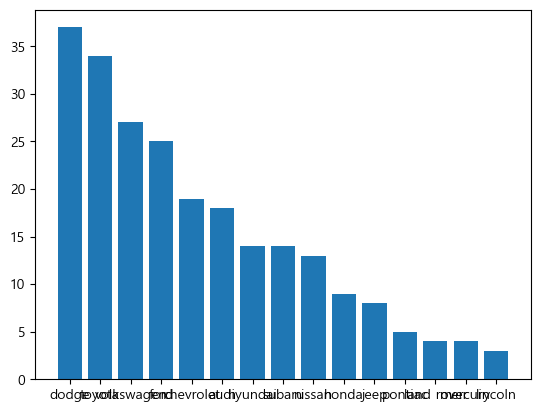

In [11]:
plt.figure()

plt.bar(mpgFrm['manufacturer'].value_counts().index, 
        mpgFrm['manufacturer'].value_counts().values)

plt.show()
plt.close()

In [12]:
print('Q1) 배기량(displ)에 따라 고속연비를 확인하고자 한다.')
print('배기량이 4 이하인 자동차와 5 이상인 자동차 중 고속도로 평균연비가 높은지를 확인한다면 ')
print()
print('case01 - ')
mpgFrm['displ'].astype(int)
hwy01 = mpgFrm[mpgFrm['displ'] <= 4]['hwy'].mean()
hwy02 = mpgFrm[mpgFrm['displ'] >= 5]['hwy'].mean()
hwy01 > hwy02

Q1) 배기량(displ)에 따라 고속연비를 확인하고자 한다.
배기량이 4 이하인 자동차와 5 이상인 자동차 중 고속도로 평균연비가 높은지를 확인한다면 

case01 - 


True

In [13]:
print('Q2) 자동차 제조사에 따른 도시 연비를 비교하려고 한다.')
print('audi, toyota 두 회사의 모든 차종에 대한 도시연비 평균을 비교')

audiCty   = mpgFrm[mpgFrm['manufacturer'] == 'audi']['cty'].mean()
toyotaCty = mpgFrm[mpgFrm['manufacturer'] == 'toyota']['cty'].mean()
print(audiCty)
print(toyotaCty)

Q2) 자동차 제조사에 따른 도시 연비를 비교하려고 한다.
audi, toyota 두 회사의 모든 차종에 대한 도시연비 평균을 비교
17.61111111111111
18.529411764705884


Q3) chevrolet, ford, honda 제조사의 모든 차종에 대한 고속도로 연비 평균을 시각화


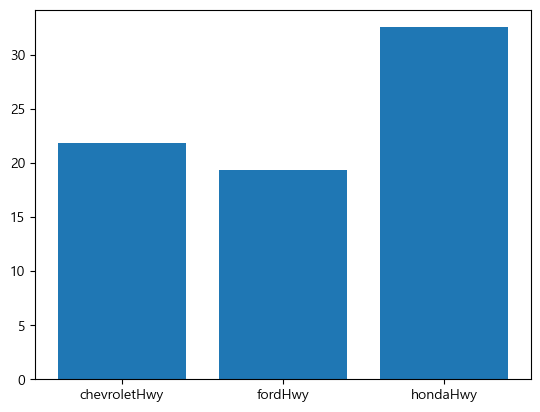

In [14]:
print('Q3) chevrolet, ford, honda 제조사의 모든 차종에 대한 고속도로 연비 평균을 시각화')

chevroletHwy = mpgFrm[mpgFrm['manufacturer'] == 'chevrolet']['hwy'].mean()
fordHwy = mpgFrm[mpgFrm['manufacturer'] == 'ford']['hwy'].mean()
hondaHwy = mpgFrm[mpgFrm['manufacturer'] == 'honda']['hwy'].mean()

manufacture01 = ['chevroletHwy', 'fordHwy', 'hondaHwy']
plt.figure()

plt.bar(manufacture01,
        [chevroletHwy, fordHwy, hondaHwy])


plt.show()
plt.close()

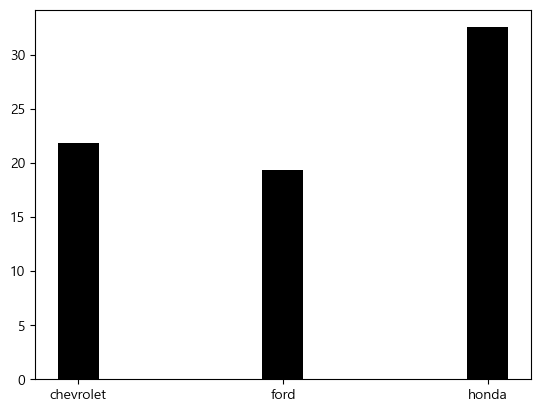

In [26]:
c_idx = (mpgFrm['manufacturer'] == 'chevrolet')
f_idx = (mpgFrm['manufacturer'] == 'ford')
h_idx = (mpgFrm['manufacturer'] == 'honda')

subset = mpgFrm.loc[c_idx | f_idx | h_idx, : ]
subset.groupby('manufacturer')['hwy'].mean()

plt.figure()

plt.bar(subset.groupby('manufacturer')['hwy'].mean().index,
        subset.groupby('manufacturer')['hwy'].mean().values,
        width = 0.2,
        color = 'black'

)

plt.show()
plt.close()

In [27]:
print('연료가격(price_fl) 파생변수를 추가하려고 한다 - ')
print('c : 가스 2.35 , d : 2.38, e : 2.11, p : 3.45, r : 2.22')
# priceDict = {'c' : 2.35 , 'd' : 2.38, 'e' : 2.11, 'p' : 3.45, 'r' : 2.22}
# key = priceDict.keys()
# value = priceDict.values()
# pd.DataFrame(key, value)

priceFrm = pd.DataFrame({
    'fl' : ['c','d','e','p','r'],
    'price_fl' : [2.35, 2.38, 2.11, 3.45, 2.22]
})

priceFrm

연료가격(price_fl) 파생변수를 추가하려고 한다 - 
c : 가스 2.35 , d : 2.38, e : 2.11, p : 3.45, r : 2.22


,fl,price_fl
0,c,2.35
1,d,2.38
2,e,2.11
3,p,3.45
4,r,2.22


In [28]:
# mpgFrm = pd.merge(mpgFrm, priceFrm, how = 'inner', on = 'fl')
mpgFrm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [29]:
mpgFrm.groupby('fl').get_group('c')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
107,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact


In [30]:
priceFrm = pd.DataFrame({
    'fl' : ['c','d','e','p','r'],
    'price_fl' : [2.35, 2.38, 2.11, 3.45, 2.22]
})
mpgFrm['price_fl'] = mpgFrm['fl'].apply(lambda x : 3.45 if x == 'p' else 2.35 if x == 'c' else 2.38 if x == 'd' else 2.11 if x == 'e' else 2.22 if x == 'r' else x)

In [31]:
mpgFrm.isnull().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
price_fl        0
dtype: int64

In [32]:
mpgFrm.loc[65 , 'hwy'] = np.NaN
mpgFrm.loc[120 , 'hwy'] = np.NaN
mpgFrm.loc[154 , 'hwy'] = np.NaN
mpgFrm.loc[189 , 'hwy'] = np.NaN
mpgFrm.loc[219 , 'hwy'] = np.NaN

In [33]:
print('isnull , isna - ')
mpgFrm[['drv','hwy']].isna().sum()

isnull , isna - 


drv    0
hwy    5
dtype: int64

In [34]:
print('Q3) hwy 결측값을 제외하고 어떤 구동방식의 고속도로평균 연비가 높은지 확인한다면')
mpgFrm[mpgFrm['hwy'] != np.NaN]

Q3) hwy 결측값을 제외하고 어떤 구동방식의 고속도로평균 연비가 높은지 확인한다면


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
1,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact,3.45
2,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact,3.45
3,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact,3.45
4,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact,3.45
5,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact,3.45
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize,3.45
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize,3.45
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize,3.45
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize,3.45


In [35]:
print('dropna - 결측값 제외')
print(mpgFrm.groupby('drv')['hwy'].mean())
print(mpgFrm[['drv','hwy']].dropna().groupby('drv').mean())

dropna - 결측값 제외
drv
4    19.217822
f    28.165049
r    21.000000
Name: hwy, dtype: float64
           hwy
drv           
4    19.217822
f    28.165049
r    21.000000


In [36]:
print('구동방식별 고속도로 연비평균을 막대 그래프로 시각화 - ')
grpDrvFrm = mpgFrm[['drv','hwy']].dropna().groupby('drv').mean()
grpDrvFrm['hwy']


구동방식별 고속도로 연비평균을 막대 그래프로 시각화 - 


drv
4    19.217822
f    28.165049
r    21.000000
Name: hwy, dtype: float64

<Figure size 640x480 with 0 Axes>

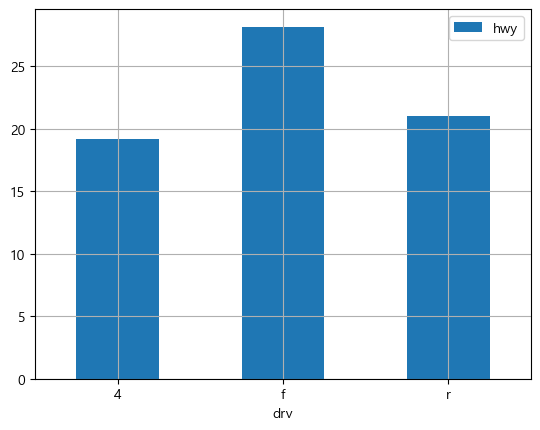

In [19]:
plt.figure()

grpDrvFrm.plot(kind = 'bar',
               rot = 0)

plt.grid()
plt.show()
plt.close()

In [20]:
print('Q4) 구동방식별 고속도로, 도시연비 평균을 서브셋을 만들고')
print('시각화 - multi bar')

Q4) 구동방식별 고속도로, 도시연비 평균을 서브셋을 만들고
시각화 - multi bar


In [21]:
subsetFrm = mpgFrm[['drv','hwy','cty']].dropna()
subsetFrm = subsetFrm.groupby('drv').mean()



<Figure size 640x480 with 0 Axes>

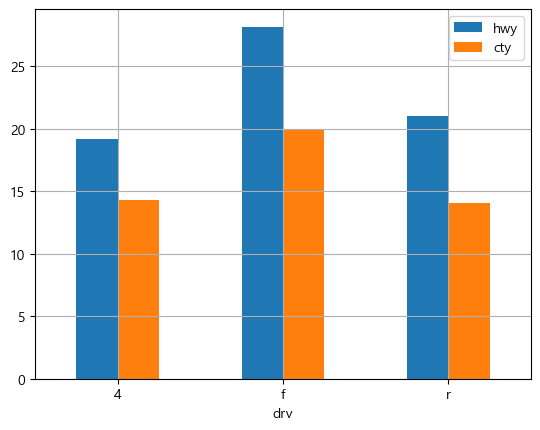

In [22]:
plt.figure()

subsetFrm.plot(kind = 'bar',
               rot = 0)

plt.grid()
plt.show()
plt.close()

In [23]:
print('Q5) 해당 클래스별 빈도수를 시각화 - ')
mpgFrm['class'].value_counts()

Q5) 해당 클래스별 빈도수를 시각화 - 


suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

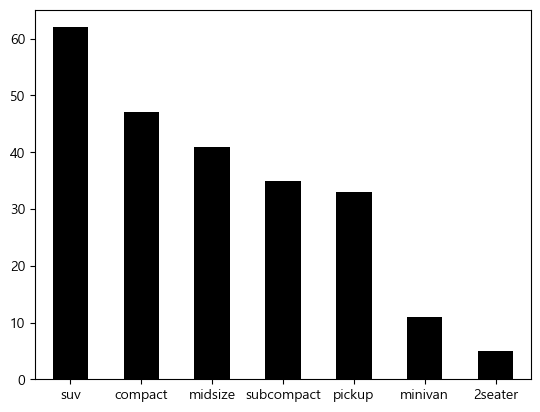

In [24]:
plt.figure()

mpgFrm['class'].value_counts().plot(kind = 'bar',
                                       rot = 0,
                                   color = 'black')
plt.show()
plt.close()

In [42]:
print('Q6) 제조사별 suv 도시연비 Top5를 시각화')
subset = mpgFrm[mpgFrm['class'] =='suv'].groupby('manufacturer')[['cty']].mean()
print(subset)
print()
print()
subset.sort_values('cty', ascending = False, inplace = True)
subset = subset.head()

Q6) 제조사별 suv 도시연비 Top5를 시각화
                    cty
manufacturer           
chevrolet     12.666667
dodge         11.857143
ford          12.888889
jeep          13.500000
land rover    11.500000
lincoln       11.333333
mercury       13.250000
nissan        13.750000
subaru        18.833333
toyota        14.375000




<Figure size 640x480 with 0 Axes>

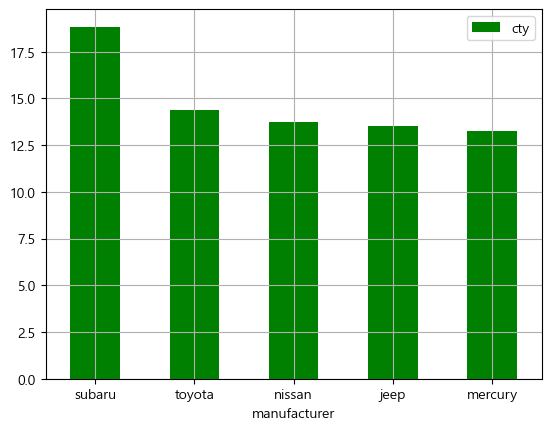

In [43]:
plt.figure()

subset.plot(kind = 'bar', rot = 0, color = 'green')

plt.grid()
plt.show()
plt.close()

- 이상치 처리

<Axes: >

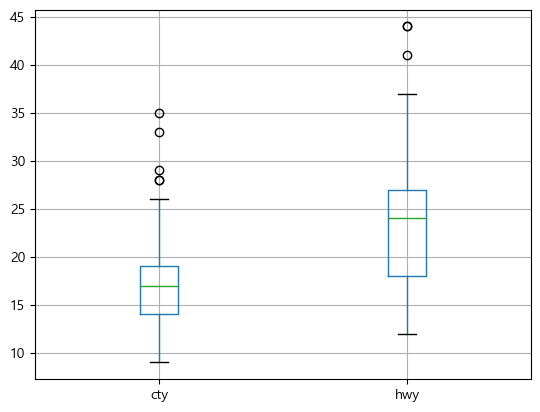

In [44]:
subset = mpgFrm.loc[:, ['cty','hwy']]
#subset
subset.boxplot()

In [45]:
print('IQR - ')
Q1 = subset.quantile(q=0.25)
Q1

IQR - 


cty    14.0
hwy    18.0
Name: 0.25, dtype: float64

In [46]:
Q3 = subset.quantile(q=0.75)
Q3

cty    19.0
hwy    27.0
Name: 0.75, dtype: float64

In [47]:
IQR = Q3 - Q1
IQR

cty    5.0
hwy    9.0
dtype: float64

In [48]:
print('lower fence - 최저 한계치')
lower = Q1 - 1.5 * IQR


lower fence - 최저 한계치


In [49]:
print('upper fence - 최고 한계치')
upper = Q3 + 1.5 * IQR
upper

upper fence - 최고 한계치


cty    26.5
hwy    40.5
dtype: float64

In [50]:
print('lower fence 경계값을 얻어 본다면 - ')
lower_outlier = subset[ subset > lower ].min()
lower_outlier

lower fence 경계값을 얻어 본다면 - 


cty     9.0
hwy    12.0
dtype: float64

In [51]:
print('upper fence 경계값을 얻어 본다면 - ')
upper_outlier = subset[ subset < upper ].max()
upper_outlier

upper fence 경계값을 얻어 본다면 - 


cty    26.0
hwy    37.0
dtype: float64

In [52]:
cleanFrm = mpgFrm.copy()
cleanFrm[['cty','hwy']].isna().sum()

cty    0
hwy    5
dtype: int64

In [53]:
print('cty outlier 확인 - ')
cty_outlier = mpgFrm[ mpgFrm['cty'] > upper_outlier['cty'] ]
for idx in cty_outlier.index:
    cleanFrm.loc[idx, 'cty'] = np.NaN

cty outlier 확인 - 


In [54]:
print('hwy outlier 확인 - ')
hwy_outlier = mpgFrm[ mpgFrm['hwy'] > upper_outlier['hwy'] ]
for idx in hwy_outlier.index:
    cleanFrm.loc[idx, 'hwy'] = np.NaN

hwy outlier 확인 - 


In [55]:
cleanFrm[['cty','hwy']].isna().sum()

cty    5
hwy    8
dtype: int64

In [56]:
print('Q6) 결측값을 평균으로 대체 cty, hwy')
print('이상치 처리 후 구동방식별 도시, 고속도로 연비 평균을 시각화 - ')

Q6) 결측값을 평균으로 대체 cty, hwy
이상치 처리 후 구동방식별 도시, 고속도로 연비 평균을 시각화 - 


In [57]:
# cleanFrm[cleanFrm['cty'].isnull()] = cleanFrm['cty'].mean() # 결측값은 == 로 비교할 수 없다. 불리언인덱싱에 다시 열값을 넣으면 할당되지 않는다. 
# cleanFrm[cleanFrm['hwy'].isnull()] = cleanFrm['hwy'].mean()
cleanFrm.loc[ cleanFrm['cty'] != cleanFrm['cty'] , 'cty'] = cleanFrm['cty'].mean()
cleanFrm.loc[ cleanFrm['hwy'] != cleanFrm['hwy'] , 'hwy'] = cleanFrm['hwy'].mean()

In [58]:
cleanFrm[['cty','hwy']].isnull().sum()

cty    0
hwy    0
dtype: int64

<Axes: >

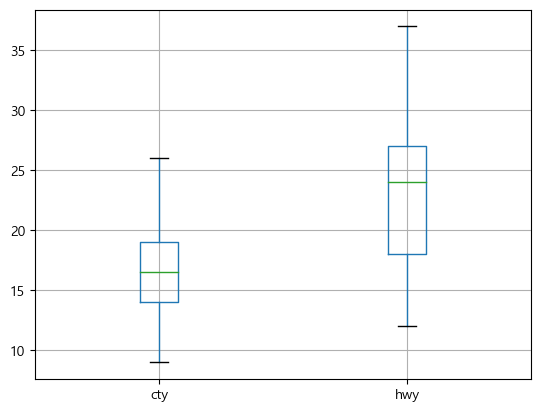

In [59]:
subset = cleanFrm.loc[:, ['cty','hwy']]
#subset
subset.boxplot()

<Figure size 640x480 with 0 Axes>

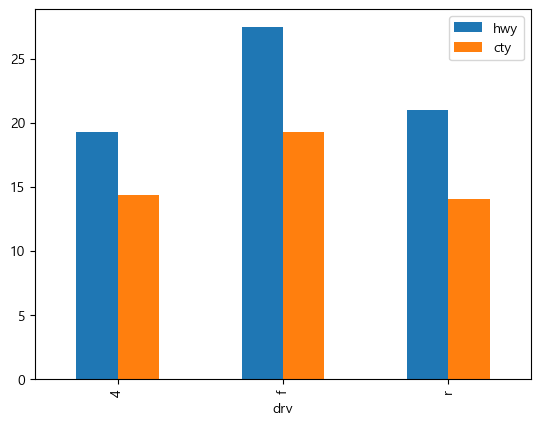

In [60]:
grpDrvFrm = cleanFrm[['drv','hwy','cty']].groupby('drv').mean()

plt.figure()
grpDrvFrm.plot(kind = 'bar')

plt.show()
plt.close()